# Week 6) Neural Network Basic 과제

In [29]:
import numpy as np
from matplotlib import pyplot as plt

## 데이터 불러오기

#### 데이터셋: CIFAR-10
- 32x32 픽셀의 60,000개 컬러이미지
- 10개의 클래스로 라벨링 되어있음

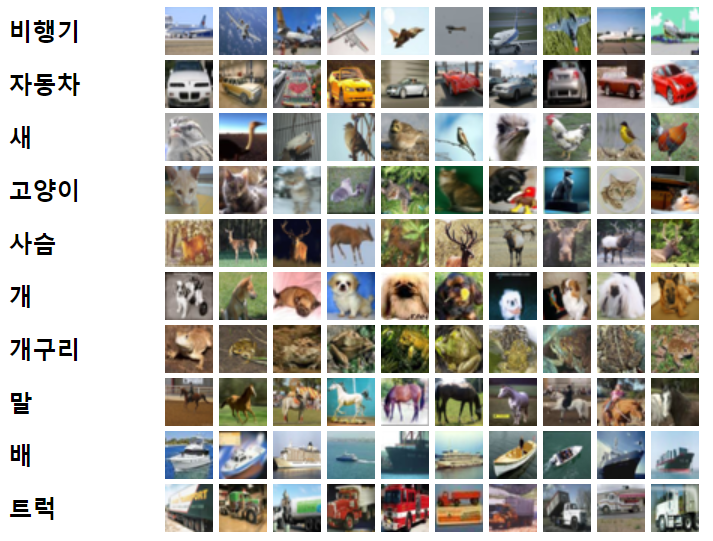

In [30]:
x_train = np.load("./x_train_data.npy")
y_train = np.load("./y_train_data.npy")
x_test = np.load("./x_test_data.npy")
y_test = np.load("./y_test_data.npy")

In [31]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5000, 3072), (5000,), (1000, 3072), (1000,))

## Activation Function

### Sigmoid Function

In [32]:
class sigmoid:
    # sigmoid 함수입니다.
    def forward(x):
        return 1 / (1+np.exp(-x))
    
    # sigmoid 함수의 미분을 작성하세요
    def backward(x):
        return x*(1-x)

In [33]:
a = np.array([-1,2,3])

In [34]:
sigmoid.forward(a)

array([0.26894142, 0.88079708, 0.95257413])

In [35]:
sigmoid.backward(a)

array([-2, -2, -6])

In [36]:
sigmoid.forward(0.051)

0.5127472371561135

### ReLU

In [37]:
0.1*0.51

0.051000000000000004

In [38]:
class relu:
    # relu 함수를 작성하세요
    def forward(x):
        return np.maximum(0, x)
    
    # relu 함수의 미분을 작성하세요
    def backward(x):
        return np.where(a >0, 1, 0)

In [39]:
xx = np.array([-1, 2, 3])
xx>1

array([False,  True,  True])

In [40]:
relu.forward(a)

array([0, 2, 3])

In [41]:
relu.backward(a)

array([0, 1, 1])

### Output Activation Function

In [42]:
class softmax:
    def forward(z):
        y = []
        for zi in z:
            # print("z", z[0])
            c = np.max(zi)
            exp_zi = np.exp(zi-c)
            sum_exp_zi = np.sum(exp_zi)
            yi = exp_zi / sum_exp_zi
            y.append(yi)
            # print("y", y[0])
        # print(y[0])
        return np.array(y)
    
    def backward(p, y) :
        dp = p.copy()
        for dpi, yi in zip(dp, y):
            for k in range(dp.shape[1]):
                if k == yi :
                    dpi[k] -= 1
        return dp

In [43]:
z = np.array([[np.log(1), np.log(3), np.log(4)]])
p = np.array([[0.125, 0.375, 0.5]])
y = np.array([2])

In [44]:
softmax.forward(z)

array([[0.125, 0.375, 0.5  ]])

In [45]:
softmax.backward(p, y)

array([[ 0.125,  0.375, -0.5  ]])

## Loss Function

### Cross Entropy

In [46]:
def cross_entropy(p, y):
    # cross entropy 함수를 작성하세요
    loss = []
    for pi, yi in zip(p, y):
        for k in range(p.shape[1]):
            if k == yi:
                loss.append((-1) * (np.log(pi[k]) + 1e-8)) # 1e-8은 무한대로 발산하는 경우를 방지하기 위해 존재합니다
    return loss

In [47]:
cross_entropy(p, y)

[0.6931471705599452]

## Layer

In [55]:
class Layer: #레이어 클래스: 레이어에 들어오는 입력 노드 갯수, 레이어에서 나오는 출력노드 개수, 그 층에서 편향
    def __init__(self, input_size, output_size, std=1e-4) :
        self.input_size = input_size
        self.output_size = output_size
        self.bias = np.random.randn(output_size)
        self.weight = np.random.randn(input_size, output_size)*std # std는 가중치 초기화에서 표준편차를 줄이기 위해 존재합니다

## Neural Network

각 메소드와 변수의 역할을 주석으로 달아주세요.

In [69]:
class CustomNet:
    # CustomNet을 선언할 때 생성되는 값들입니다.
    def __init__(self, lr=0.0001, epoch=500, batch_size=200):
        self.lr = lr #학습률
        self.epoch = epoch #에폭
        self.batch_size = batch_size #배치 사이즈
        self.loss_function = cross_entropy # mse로 대체 가능하지만 이번 과제는 분류이므로 cross_entropy로 넣었습니다
        self.layers = [] 
        self.activations = [softmax]
        self.nodes = []
    
    # Layer를 추가할 때 호출합니다
    def addLayer(self, Layer): 
        self.layers.append(Layer)
        if not self.nodes:
            self.nodes.append(np.zeros(Layer.input_size))
        self.nodes.append(np.zeros(Layer.output_size))
    
    # Activation Function을 추가할 때 호출합니다
    def addActivation(self, Activation):
        tmp = self.activations.pop()
        self.activations.append(Activation)
        self.activations.append(tmp)
        
    # 순전파 함수
    def _forward(self, X):
        self.nodes[0] = X.copy()
        output = X.copy()
        for i in range(len(self.layers)):
            Layer = self.layers[i]
            Activation = self.activations[i]
            output = np.dot(self.nodes[i], Layer.weight) # w*x 하는 과정
            output = output+ Layer.bias # w*x + b 하는 과정
            output = Activation.forward(output) #w*x + b를 activation function에 넣는다.
            self.nodes[i+1] = output 
        return output   
    
    # 역전파 함수
    def _backward(self, X, output, y) :
        for i in reversed(range(len(self.layers))):
            a = self.nodes[i+1] 
            Layer = self.layers[i]
            Activation = self.activations[i]
            if i+1 == len(self.layers):
                error = Activation.backward(output, y) # 마지막 레이어라면 softmax 그래디언트 계산을 한다.
            else:
                print('error:',error.shape)
                print('activation:', Activation.backward(a).shape) # 마지막 레이어가 아니라면 해당 함수의 그래디언트 계산을 한다.
                error *= Activation.backward(a)
            # w 조정
            Layer.weight -= np.dot(error.T, self.nodes[i]).T*self.lr/X.shape[0]
            # b 조정
            Layer.bias -= error.sum(axis=0)*self.lr/X.shape[0]
            error = np.dot(error, Layer.weight.T)
    
    # Accrucy를 반환합니다
    def _accuracy(self, output, y):
        pre_p = np.argmax(output, axis=1)
        return np.sum(pre_p==y)/y.shape[0]
    
    # 데이터셋에 모델을 fit할때 호출합니다
    def fit(self, X, y, val_X, val_y):
        history = {'val_acc': [],'val_loss': []}
        N = X.shape[0]
        for i in range(self.epoch):
            for j in range(N//self.batch_size):
                batch_mask = np.random.choice(N, self.batch_size)
                X_batch = X[batch_mask]
                y_batch = y[batch_mask]
                output = self._forward(X_batch)
                self._backward(X_batch, output, y_batch)
            
            #accuracy와 loss를 기록해둡시다
            output = self._forward(val_X)
            history["val_acc"].append(self._accuracy(output, val_y))
            history["val_loss"].append(sum(self.loss_function(output, val_y)))
            
            #중간중간 기록을 찍어볼 때 사용. 적절히 조절해 쓰세요
            if i % 50 == 0:
                print(i, "test accuracy :", history["val_acc"][-1])
                print(i, "test loss     :", history["val_loss"][-1])
        return history

In [51]:
# 하이퍼 파라미터를 적절히 조절해 뉴럴넷을 선언하세요
nn = CustomNet(lr=0.0005, epoch=85, batch_size=400)

# 원하는 만큼 층과 활성화 함수를 쌓아 주세요. 기본적으로 2Layer를 예시로 적어드립니다
nn.addLayer(Layer(3072,1500))
nn.addActivation(sigmoid)
nn.addLayer(Layer(1500,10))

In [52]:
# 선언한 뉴럴넷의 구조입니다
for layer in nn.layers:
    print(layer.weight.shape, layer.bias.shape)

(3072, 1500) (1500,)
(1500, 10) (10,)


In [53]:
history = nn.fit(x_train, y_train, x_test, y_test)

0 test accuracy : 0.102
0 test loss     : 2554.384291821133
50 test accuracy : 0.319
50 test loss     : 1936.8221407407398


## Accuracy 그래프

학습한 결과를 그래프로 그려보고 높은 Accuracy를 노려보세요!

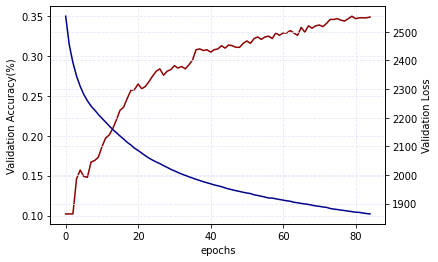

Best Validation Accuracy :  0.35


In [54]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

# 에포크 숫자만큼 range(epoch)를 변경해주셔야 합니다~
ax_acc.plot(range(85), history['val_acc'], label='정확도(%)', color='darkred')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(85), history['val_loss'], label='오차', color='darkblue')
plt.ylabel('Validation Loss')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 최고 validation accuracy는?
print("Best Validation Accuracy : ",max(history['val_acc']))

In [56]:
# 하이퍼 파라미터를 적절히 조절해 뉴럴넷을 선언하세요
nn1 = CustomNet(lr=0.0005, epoch=85, batch_size=400)

# 원하는 만큼 층과 활성화 함수를 쌓아 주세요. 기본적으로 2Layer를 예시로 적어드립니다
nn1.addLayer(Layer(3072,1500))
nn1.addActivation(sigmoid)
nn1.addLayer(Layer(1500,1000))
nn1.addActivation(sigmoid)
nn1.addLayer(Layer(1000, 10))

In [57]:
# 선언한 뉴럴넷의 구조입니다
for layer in nn1.layers:
    print(layer.weight.shape, layer.bias.shape)

(3072, 1500) (1500,)
(1500, 1000) (1000,)
(1000, 10) (10,)


In [58]:
history = nn1.fit(x_train, y_train, x_test, y_test)

0 test accuracy : 0.086
0 test loss     : 2581.726843339074
50 test accuracy : 0.106
50 test loss     : 2301.835301812189


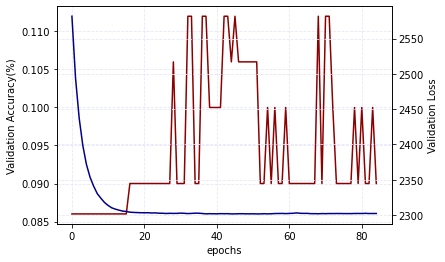

Best Validation Accuracy :  0.112


In [59]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

# 에포크 숫자만큼 range(epoch)를 변경해주셔야 합니다~
ax_acc.plot(range(85), history['val_acc'], label='정확도(%)', color='darkred')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(85), history['val_loss'], label='오차', color='darkblue')
plt.ylabel('Validation Loss')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 최고 validation accuracy는?
print("Best Validation Accuracy : ",max(history['val_acc']))

아무래도 relu를 사용해야할 것 같은데 계산하면서 shape이 안맞아서 에러가 나는 것 같아 추후 수정예정입니다ㅜ